
# Relatório Final : Maratona de Filmes

Aluno: Davi Reis Vieira de Souza

<img src="public/maratona.jpg" alt="Maratona de Filmes" width="300"/>

## Sumário

* 1. [Introdução](#Introdução)
* 2. [Objetivo](#Objetivo)
* 3. [Arquivo Output](##Arquivo-Output)
* 4. [Heurística Gulosa e Aleatorização](#Heurística-Gulosa-e-Aleatorização)
    * 4.1. [Heurística Gulosa](##Heurística-Gulosa)
    * 4.2. [Aleatorização](##Heuristica-Gulosa-com-Aleatorização)
    * 4.3. [O Código](##O-Código)
    * 4.4. [Valgrind](##Valgrind)
    * 4.5. [Comparações com base em dados de desempenho](##Comparações-com-base-em-dados-de-desempenho)
    * 4.6. [Comparando categorias](##Comparando-categorias)
    * 4.7. [Analisando filmes por categoria](##Analisando-filmes-por-categoria)
    * 4.8. [Conclusões](##Conclusões)
* 5. [Busca exaustiva com OpenMP e GPU](#Busca-exaustiva-com-OpenMP-e-GPU)
    * 5.1. [Busca exaustiva com OpenMP](##Busca-exaustiva-com-OpenMP)
        * 5.1.1. [Código](###OCódigo)
    * 5.2. [Busca exaustiva com GPU](##Busca-exaustiva-com-GPU)
        * 5.2.1. [Código](###OCódigo)
    * 5.3. [Comparando os resultados](##Comparando-os-resultados)
    * 5.4. [Conclusões](##Conclusões)
* 6. [Conclusões Gerais](#Conclusões-Gerais)
* 7. [Referências](#Referências)


## Introdução

Queremos passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

**Entrada**: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

**Saída**: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

Abaixo, temos o seguinte exemplo de *input*:

```txt
10 4
1 3 1 2 
11 13 3
14 15 3
10 16 2
```

Como ler esse arquivo?

- A primeira linha indica que há 10 filmes a serem considerados e 4 categorias;
- a segunda linha indica qual o máximo de filmes que cada categoria pode ter;
- da terceira linha em diante você vai encontrar os n filmes, suas respectivas hora de início, hora de término e categoria pertencente.

## Objetivo

O objetivo do projeto é conseguir agrupar o máximo de filmes que podem ser assistidos em um dia conforme as instruções e as instruções dadas.

# Arquivo Output

O arquivo de saída é gerado pelo programa e contém a:

- Quantidade de filmes na maratona
- Lista de filmes, com seus respectivos:
    - IDs
    - Horário de início
    - Horário de fim
    - Categoria

Exemplo de arquivo de saída:

```
20
474 0 1 20
99 1 2 70
184 2 4 12
581 4 5 52
92 5 6 9
849 6 7 18
746 7 8 33
319 8 9 3
179 9 10 74
207 10 11 57
757 11 12 18
618 13 13 17
628 14 15 36
358 16 16 87
351 17 18 35
304 18 19 87
794 19 20 44
51 20 21 54
360 22 22 37
541 23 24 39
```

Desta forma, é possível facilmente pegar os dados de saída e gerar um arquivo de texto com a lista de filmes da maratona e, com isso, gerar gráficos a partir dos dados, como veremos mais a frente.

# Heurística Gulosa e Aleatorização

## Heuristica Gulosa

A heurística gulosa é um algoritmo que resolve problemas de otimização tentando encontrar a melhor solução possível em cada etapa, sem olhar para o resultado final. No caso do problema da *Maratona de Filmes*, a heurística gulosa funciona da seguinte forma:

- Ordena os filmes em ordem crescente do horário de fim;
- Aplicaam-se as restrições e escolhe-se o primeiro filme que as possuiam de acordo com os horários de fim;
- Quando não houver mais espaço livre na *Maratona*, a heurística termina.

A heurística gulosa é usada para encontrar soluções ótimas em problemas de otimização, mas nem sempre garante a melhor solução. No entanto, é útil para problemas grandes em que encontrar a solução ótima é difícil. O algoritmo pode ser modificado e combinado com outras técnicas para melhorar a qualidade da solução encontrada.





## Heuristica Gulosa com Aleatorização

Essa implementação consiste na adaptação da heurística gulosa de nosso projeto. A proposta é que modifiquemos a heurística gulosa de modo que ao longo da seleção de um filme, hajam 25% de chance de pegar outro filme qualquer que respeite o mesmo horário analisado. Isso fará com que a heurística tenha um pouco mais de exploration e os resultados sejam melhores, pois a heurística não ficará presa em um ótimo local.

Além disso, como ela possui o caráter aleatório, ela pode ser usada para encontrar soluções diferentes para o mesmo problema, o que pode ser útil para encontrar soluções melhores.

## O Código

### Heuristica Gulosa

Abaixo, a explicação por partes principais do código:

#### Bibliotecas

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>
```

São as bibliotecas padrões da linguagem C++. `iostream` é para entrada e saída de dados, ``vector`` é para armazenar listas de objetos, ``algorithm`` é para algoritmos de ordenação e outras operações em contêineres, ``iomanip`` é para manipulação de fluxos de saída e ``bitset`` é para manipulação de bits.

#### Estruturas de Dados

```cpp
struct Filme {
    int id;
    int inicio;
    int fim;
    int categoria;
    std::bitset<24> horario;
};

struct Categoria {
    int id;
    int quantidade;
};

struct Maratona {
    std::bitset<24> disponibilidade;
    std::vector<Filme> filmes;
};
```

São as estruturas de dados utilizadas no código. A estrutura ``Filme`` armazena as informações de cada filme, como id, horário de início e fim e categoria. A estrutura ``Categoria`` armazena o id e a quantidade de filmes de cada categoria. A estrutura ``Maratona`` armazena a disponibilidade de horários da maratona e os filmes selecionados.

#### Funções Auxiliares

```cpp
std::bitset<24> gera_horario(int inicio, int fim) {
    std::bitset<24> horario;

    if (inicio == fim) {
        horario.set(inicio);
        return horario;
    }
    
    for (int i = inicio; i < fim; i++) {
        horario.set(i);
    }

    return horario;
}

bool compara_filme(Filme a, Filme b) {
    return a.fim < b.fim;
}
```

A função ``gera_horario`` recebe o horário de início e fim de um filme e retorna um std::bitset<24> com os bits correspondentes ao horário ocupado pelo filme. A função ``compara_filme`` é utilizada para ordenar os filmes de acordo com o horário de fim, em ordem crescente.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // lê o número de filmes e de categorias
    vector<Filme> filmes(n); // cria um vetor de filmes com tamanho n
    vector<Categoria> categorias(m); // cria um vetor de categorias com tamanho m
    Maratona maratona; // cria uma maratona

    // Lê a quantidade de filmes de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Se o horário de início é maior que o horário de fim,
        // significa que o filme se estende até o dia seguinte
        if (inicio > fim) {
            if (fim == 0) {
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue; // Ignora filmes com horários inválidos
            } else {
                continue; // Ignora filmes com horários inválidos
            }
        }

        // Cria um filme com as informações lidas
        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        // Adiciona o filme ao vetor de filmes
        filmes.push_back(filme);
    }

    // Ordena os filmes por ordem crescente de horário de fim
    sort(filmes.begin(), filmes.end(), compara_filme);

    // Chama a função que implementa a heurística gulosa para encontrar a programação da maratona
    heuristica_gulosa(filmes, categorias, maratona);

    return 0;
}
```

#### Heurística Gulosa

```cpp
void heuristica_gulosa(vector<Filme> &filmes, vector<Categoria> &categorias, Maratona &maratona) {
    int maximo = 0;
    int size_of_filmes = filmes.size();

    for (int i = 0; i < size_of_filmes; i++) {
        Filme filme = filmes[i];
        int categoria = filme.categoria;
        std::bitset<24> horario = filme.horario;

        if (categorias[categoria - 1].quantidade == 0) {
            continue;
        }

        if (maratona.disponibilidade == 0) {
            maratona.disponibilidade = horario;
            maratona.filmes.push_back(filme);
            categorias[categoria - 1].quantidade--;
            maximo++;
        } else {
            if ((maratona.disponibilidade & horario) == 0) {
                maratona.disponibilidade |= horario;
                maratona.filmes.push_back(filme);
                categorias[categoria - 1].quantidade--;
                maximo++;
            }
        }
    }

    cout << maximo << endl;

    for (int i = 0; i < maximo; i++) {
        cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
    }
}
```

A função ``heuristica_gulosa`` implementa uma heurística gulosa para encontrar a maior quantidade possível de filmes em uma maratona de acordo com a disponibilidade e a categoria de cada filme.

A função recebe três argumentos: ``filmes``, um vetor contendo todos os filmes a serem considerados na maratona; ``categorias``, um vetor de estrutura ``Categoria`` que contém informações sobre a quantidade de filmes que podem ser selecionados para cada categoria; e ``maratona``, uma estrutura que contém um vetor de filmes selecionados e uma ``bitset`` representando a disponibilidade de horários na maratona.

A função começa definindo a variável ``maximo`` como 0, que será atualizada com a quantidade máxima de filmes selecionados para a maratona. Em seguida, um loop é executado para cada filme em ``filmes``.

Para cada filme, a função verifica se a categoria desse filme já teve a quantidade máxima de filmes selecionados, caso tenha, o filme é pulado e o loop continua. Caso contrário, a função verifica se a disponibilidade de horários da maratona é 0 (ou seja, nenhum filme foi selecionado até agora). Se for esse o caso, a disponibilidade de horários é atualizada com a disponibilidade do horário do filme e o filme é adicionado ao vetor de filmes selecionados na maratona. A quantidade de filmes da categoria correspondente é decrementada e a variável ``maximo`` é incrementada.

Caso a disponibilidade de horários da maratona já tenha sido definida, a função verifica se a disponibilidade do horário do filme selecionado não entra em conflito com a disponibilidade dos horários dos filmes já selecionados. Isso é feito usando a operação bit a bit "AND" entre as disponibilidades de horário do filme e da maratona. Se o resultado for 0, significa que os horários não entram em conflito e o filme pode ser adicionado. Caso contrário, o filme é pulado.

Por fim, a função imprime o valor de ``maximo``, que representa a quantidade de filmes selecionados para a maratona, e imprime as informações dos filmes selecionados: seu id, horário de início e horário de fim.

### Aleatoriedade

O código da estratégia de Aleatorização se diferencia somente na função ``main`` e o uso da nova função ``aleatoriedade``.

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // Lê o número de filmes (n) e o número de categorias (m)

    vector<Filme> filmes; // Vetor que armazenará os filmes
    vector<Categoria> categorias(m); // Vetor que armazenará as categorias
    Maratona maratona; // Objeto que representará a maratona

    // Lê a quantidade de filmes para cada categoria e inicializa o id de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes e gera a lista de filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Trata casos em que o horário do filme é inválido
        if (inicio > fim) {
            if (fim == 0){
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue;
            } else {
                continue;
            }
        }

        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        filmes.push_back(filme);
    }

    sort(filmes.begin(), filmes.end(), compara_filme); // Ordena os filmes por horário de término

    int size_of_filmes = filmes.size();

    map<int, vector<Filme>> filmes_por_horario; // Mapa que armazenará os filmes por horário

    // Separa os filmes por horário de término
    for (int i = 0; i < size_of_filmes; i++) {
        filmes_por_horario[filmes[i].fim].push_back(filmes[i]);
    }

    // Realiza a escolha aleatória dos filmes para a maratona
    aleatoriedade(categorias, maratona, filmes_por_horario);

    return 0;
}
```

#### Aleatoriedade

```cpp
void aleatoriedade(vector<Categoria> &categorias, Maratona &maratona, map<int, vector<Filme>> filmes_por_horario){
    unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
    std::default_random_engine generator (seed);
    std::binomial_distribution<int> distribution (1, 0.75);
    distribution(generator);

    bitset<24> mochila_cheia(0xFFFFFF);

    for (int i = 1; i <= 24; i++){
        if (maratona.disponibilidade == mochila_cheia){
            break;
        }

        if (filmes_por_horario[i].size() == 0){
            continue;
        }

        Filme filme_escolhido;

        srand(time(NULL));
        if (distribution(generator)){
            for (int j = 0; j < static_cast<int>(filmes_por_horario[i].size()); j++){
                if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
                    filme_escolhido = filmes_por_horario[i][j];
                    break;
                }

                filme_escolhido.id = -1;
            }
        } else {
            vector<Filme> filmes_disponiveis_no_horario;

            for (int j = 1; j < static_cast<int>(filmes_por_horario[i].size()); j++){
                if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
                    filmes_disponiveis_no_horario.push_back(filmes_por_horario[i][j]);
                }
            }

            if (filmes_disponiveis_no_horario.size() == 0){
                continue;
            }

            filme_escolhido = filmes_disponiveis_no_horario[rand() % filmes_disponiveis_no_horario.size()];
        }

        if (filme_escolhido.id == -1){
            continue;
        }

        maratona.disponibilidade |= filme_escolhido.horario;
        maratona.filmes.push_back(filme_escolhido);
        categorias[filme_escolhido.categoria - 1].quantidade--;        
    }

    cout << maratona.filmes.size() << endl;

    for (int i = 0; i < static_cast<int>(maratona.filmes.size()); i++){
        cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
    }

    cout << endl;
}
```

A função ``aleatoriedade`` é responsável por gerar uma maratona aleatória de filmes que se encaixam dentro dos horários disponíveis e ainda respeitam a quantidade de filmes por categoria.

Primeiramente, a função gera uma seed aleatória baseada no tempo atual para ser usada no gerador de números aleatórios. Em seguida, é criada uma distribuição binomial com probabilidade de sucesso de 0.75, que será usada para determinar se um filme disponível no horário será escolhido ou não.

A partir daí, é feito um loop pelos 24 horários possíveis. Se a maratona já estiver cheia, o loop é interrompido. Se não houver filmes disponíveis no horário atual, o loop segue para o próximo horário. 


A função utiliza a distribuição binomial criada anteriormente para escolher qual método de escolha será utilizado. Se o número aleatório gerado for 0, a função escolhe um filme aleatório dentre os disponíveis no horário atual. Caso contrário, a função escolhe o filme com o menor horário de término dentre os disponíveis no horário atual.

Ele antes verifica se algum filme foi selecionado.

Após isso, ele é adicionado à lista de filmes da maratona. A quantidade de filmes da sua categoria é reduzida em 1. A disponibilidade de horários da maratona é atualizada com a disponibilidade do filme selecionado.

Por fim, a função imprime a quantidade de filmes na maratona, seguida da lista de filmes, com seus respectivos IDs, horários de início e fim e categoria.

## Arquivo Output

O arquivo de saída é gerado pelo programa e contém a:

- Quantidade de filmes na maratona
- Lista de filmes, com seus respectivos:
    - IDs
    - Horário de início
    - Horário de fim
    - Categoria

Exemplo de arquivo de saída:

```
20
474 0 1 20
99 1 2 70
184 2 4 12
581 4 5 52
92 5 6 9
849 6 7 18
746 7 8 33
319 8 9 3
179 9 10 74
207 10 11 57
757 11 12 18
618 13 13 17
628 14 15 36
358 16 16 87
351 17 18 35
304 18 19 87
794 19 20 44
51 20 21 54
360 22 22 37
541 23 24 39
```

Desta forma, é possível facilmente pegar os dados de saída e gerar um arquivo de texto com a lista de filmes da maratona e, com isso, gerar gráficos a partir dos dados, como veremos mais a frente.

## Valgrind

Utilizando a ferramenta Valgrind, é possível analisar o programa e verificar se ele possui algum erro de memória. Além disso, é possível observar possíveis otimizações no código que podem ser feitas para melhorar a performance do programa.

Para o contexto deste Projeto, utilizaremos esta ferramenta para comparar a performace de cada estratégia de geração de maratonas.

Antes de continuar, é importante instalar a ferramenta Valgrind. Para isso, basta executar o seguinte comando no terminal:


In [1]:
!sudo apt-get install valgrind

[sudo] password for user: 


### Heurística Gulosa

In [5]:
!valgrind --tool=callgrind --vgdb=no ./gulosa < inputs/input-10k.txt  > gulosa_output_valgrind.txt

==945824== Callgrind, a call-graph generating cache profiler
==945824== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==945824== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==945824== Command: ./gulosa
==945824== 
==945824== For interactive control, run 'callgrind_control -h'.
==945824== 
==945824== Events    : Ir
==945824== Collected : 44971779
==945824== 
==945824== I   refs:      44,971,779


In [ ]:
!callgrind_annotate callgrind.out.945824 gulosa.cpp 

```txt
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.945824' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 9240846
Trigger: Program termination
Profiled target:  ./gulosa (PID 945824, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   gulosa.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
44,971,779  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,078,213  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
5,462,182  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,225,106  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,557,984  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
2,528,568  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,001,366  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,695,186  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
1,655,610  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,327,630  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
1,211,735  gulosa.cpp:compara_filme(Filme, Filme) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
1,173,978  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,047,080  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
1,032,102  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2 [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  964,256  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  664,378  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  648,680  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  606,923  ???:0x00000000048e9130 [???]
  572,527  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  563,233  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  542,688  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  541,836  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  451,950  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  444,753  ???:0x00000000048e6880 [???]
  304,196  gulosa.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<Categoria, std::allocator<Categoria> >&, Maratona&) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  274,548  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  270,802  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  269,683  /usr/include/c++/9/bits/stl_algo.h:main
  228,053  gulosa.cpp:main [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  197,806  /usr/include/c++/9/bitset:gera_horario(int, int)
  182,238  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  179,802  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  175,392  /usr/include/c++/9/bits/predefined_ops.h:main
  162,635  gulosa.cpp:gera_horario(int, int) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  146,579  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
  118,149  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   90,419  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   90,390  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   83,011  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   72,727  /usr/include/c++/9/bits/stl_vector.h:main
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   70,287  /usr/include/c++/9/bits/stl_uninitialized.h:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
   60,623  ???:0x00000000048e64f0 [???]
   60,271  ???:0x00000000048e9080 [???]
   60,266  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   60,215  ???:0x00000000048e7530 [???]
   60,209  ???:0x00000000048e6f30 [???]
   60,209  ???:0x00000000048e86a0 [???]
   60,204  ???:0x0000000000109170 [???]
   60,204  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   46,879  /usr/include/c++/9/bits/stl_algo.h:void std::__move_median_to_first<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/gulosa]
   40,001  /usr/include/c++/9/bits/stl_uninitialized.h:main

--------------------------------------------------------------------------------
-- User-annotated source: gulosa.cpp
--------------------------------------------------------------------------------
Ir      

-- line 19 ----------------------------------------
      .      int quantidade;
      .  };
      .  
      .  struct Maratona {
      .      std::bitset<24> disponibilidade;
      .      std::vector<Filme> filmes;
      .  };
      .  
242,347  bool compara_filme(Filme a, Filme b) {
727,041      return a.fim < b.fim;
242,347  }
      .  
 18,172  std::bitset<24> gera_horario(int inicio, int fim) {
 18,042      std::bitset<24> horario;
      .  
 18,172      if (inicio == fim) {
     65          horario.set(inicio);
    195          return horario;
      .      }
      .      
 62,885      for (int i = inicio; i < fim; i++) {
 26,932          horario.set(i);
      .      }
      .  
      .      return horario;
 18,172  }
      .  
     13  void heuristica_gulosa(vector<Filme> &filmes, vector<Categoria> &categorias, Maratona &maratona) {
      1      int maximo = 0;
      1      int size_of_filmes = filmes.size();
      .  
 76,326      for (int i = 0; i < size_of_filmes; i++) {
 76,344          Filme filme = filmes[i];
      .          int categoria = filme.categoria;
      .          std::bitset<24> horario = filme.horario;
      .  
114,516          if (categorias[categoria - 1].quantidade == 0) {
      .              continue;
      .          }
      .  
 18,172          if (maratona.disponibilidade == 0) {
      .              maratona.disponibilidade = horario;
      .              maratona.filmes.push_back(filme);
      .              categorias[categoria - 1].quantidade--;
      .              maximo++;
      .          } else {
 18,170              if ((maratona.disponibilidade & horario) == 0) {
      .                  maratona.disponibilidade |= horario;
      6                  maratona.filmes.push_back(filme);
     72                  categorias[categoria - 1].quantidade--;
     24                  maximo++;
      .              }
      .          }
      .      }
      .  
      4      cout << maximo << endl;
  7,298  => ???:0x0000000000109240 (1x)
      .  
     56      for (int i = 0; i < maximo; i++) {
    480          cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
 40,037  => ???:0x0000000000109240 (96x)
      .      }
     11  }
      .  
     11  int main() {
      .      int n, m;
      6      cin >> n >> m;
  9,051  => ???:0x0000000000109170 (2x)
      1      vector<Filme> filmes(n);
      1      vector<Categoria> categorias(m);
      .      Maratona maratona;
      .      
    305      for (int i = 0; i < m; i++) {
    301          cin >> categorias[i].quantidade;
121,283  => ???:0x0000000000109170 (100x)
    300          categorias[i].id = i + 1;
      .      }
      .  
 20,005      for (int i = 0; i < n; i++) {
      .          int inicio, fim, categoria;
 90,001          cin >> inicio >> fim >> categoria;
34,747,066  => ???:0x0000000000109170 (30,000x)
      .  
 50,000          if (inicio > fim) {
  2,666              if (fim == 0){
    838                  fim = 24;
      .              } else if (inicio == -1 || fim == -1) {
      .                  continue;
      .              } else {
      .                  continue;
      .              }
      .          }
      .  
      .          Filme filme;
  9,086          filme.id = i + 1;
  9,086          filme.inicio = inicio;
  9,086          filme.fim = fim;
 18,172          filme.categoria = categoria;
 18,172          filme.horario = gera_horario(inicio, fim);
360,441  => gulosa.cpp:gera_horario(int, int) (9,086x)
      .  
      .          filmes.push_back(filme);
      .      }
      .  
      .      sort(filmes.begin(), filmes.end(), compara_filme);
      .  
      4      heuristica_gulosa(filmes, categorias, maratona);
427,127  => gulosa.cpp:heuristica_gulosa(std::vector<Filme, std::allocator<Filme> >&, std::vector<Categoria, std::allocator<Categoria> >&, Maratona&) (1x)
      .  
      .      return 0;
      .  
     15  }

--------------------------------------------------------------------------------
Ir        
--------------------------------------------------------------------------------
1,906,622  events annotated
```

### Aleatoriedade 

In [24]:
!valgrind --tool=callgrind --vgdb=no ./aleatoriedade < inputs/input-10k.txt  > aleatoriedade_output_valgrind.txt

==956164== Callgrind, a call-graph generating cache profiler
==956164== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==956164== Using Valgrind-3.15.0 and LibVEX; rerun with -h for copyright info
==956164== Command: ./aleatoriedade
==956164== 
==956164== For interactive control, run 'callgrind_control -h'.
==956164== 
==956164== Events    : Ir
==956164== Collected : 42245947
==956164== 
==956164== I   refs:      42,245,947


In [ ]:
!callgrind_annotate callgrind.out.956164 aleatoriedade.cpp 

```txt
--------------------------------------------------------------------------------
Profile data file 'callgrind.out.956164' (creator: callgrind-3.15.0)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 8990130
Trigger: Program termination
Profiled target:  ./aleatoriedade (PID 956164, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   aleatoriedade.cpp
Auto-annotation:  off

--------------------------------------------------------------------------------
Ir         
--------------------------------------------------------------------------------
42,245,947  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir         file:function
--------------------------------------------------------------------------------
8,078,213  ???:std::istreambuf_iterator<char, std::char_traits<char> > std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::_M_extract_int<long>(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
5,462,182  /build/glibc-SzIz7B/glibc-2.31/libio/getc.c:getc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
4,225,106  /build/glibc-SzIz7B/glibc-2.31/libio/genops.c:_IO_sputbackc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
3,557,984  /build/glibc-SzIz7B/glibc-2.31/libio/ioungetc.c:ungetc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
2,528,568  ???:std::istream::sentry::sentry(std::istream&, bool) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
2,001,366  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::underflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,655,610  ???:std::istream::operator>>(int&) [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,173,978  ???:0x0000000000126e50 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
1,052,479  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:_dl_lookup_symbol_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  964,224  /build/glibc-SzIz7B/glibc-2.31/libio/iofflush.c:fflush [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  664,202  ???:0x0000000000125250 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  661,862  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
  648,680  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::uflow() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  606,923  ???:0x00000000048e9130 [???]
  572,508  /build/glibc-SzIz7B/glibc-2.31/libio/libioP.h:fflush
  572,301  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:do_lookup_x [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  542,660  /build/glibc-SzIz7B/glibc-2.31/libio/fileops.c:_IO_file_sync@@GLIBC_2.2.5 [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  541,836  ???:0x0000000000126f00 [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  527,435  aleatoriedade.cpp:compara_filme(Filme, Filme) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  508,020  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2
  451,935  ???:std::ostream::flush() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  444,753  ???:0x00000000048e6880 [???]
  404,742  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)'2 [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  297,429  /usr/include/c++/9/bits/stl_tree.h:main
  283,539  aleatoriedade.cpp:main [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  275,569  /build/glibc-SzIz7B/glibc-2.31/elf/../sysdeps/x86_64/dl-machine.h:_dl_relocate_object
  270,490  /usr/include/c++/9/bits/stl_tree.h:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >)
  197,806  /usr/include/c++/9/bitset:gera_horario(int, int)
  197,476  /usr/include/c++/9/bits/stl_uninitialized.h:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
  182,190  ???:std::locale::id::_M_id() const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
  177,338  /usr/include/c++/9/bits/predefined_ops.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
  163,152  /build/glibc-SzIz7B/glibc-2.31/stdlib/random_r.c:srandom_r [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
  162,635  aleatoriedade.cpp:gera_horario(int, int) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
  153,769  /usr/include/c++/9/bits/stl_vector.h:main
  129,904  /usr/include/c++/9/bits/stl_algo.h:main
  119,220  /build/glibc-SzIz7B/glibc-2.31/elf/dl-lookup.c:check_match [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
  106,348  /usr/include/c++/9/bits/move.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>)
   90,749  /build/glibc-SzIz7B/glibc-2.31/elf/do-rel.h:_dl_relocate_object
   90,387  ???:__gnu_cxx::stdio_sync_filebuf<char, std::char_traits<char> >::sync() [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   90,258  /usr/include/c++/9/bits/stl_algo.h:void std::__introsort_loop<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, long, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
   85,980  /build/glibc-SzIz7B/glibc-2.31/string/../sysdeps/x86_64/strcmp.S:strcmp [/usr/lib/x86_64-linux-gnu/ld-2.31.so]
   85,707  /usr/include/c++/9/bits/predefined_ops.h:main
   71,545  /build/glibc-SzIz7B/glibc-2.31/elf/dl-addr.c:_dl_addr [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   60,607  ???:0x00000000048e64f0 [???]
   60,269  ???:0x00000000048e9080 [???]
   60,264  /build/glibc-SzIz7B/glibc-2.31/libio/../sysdeps/unix/sysv/linux/x86/lowlevellock.h:fflush
   60,215  ???:0x00000000048e7530 [???]
   60,209  ???:0x00000000048e6f30 [???]
   60,209  ???:0x00000000048e86a0 [???]
   60,204  ???:0x000000000010a2b0 [???]
   60,204  ???:std::num_get<char, std::istreambuf_iterator<char, std::char_traits<char> > >::do_get(std::istreambuf_iterator<char, std::char_traits<char> >, std::istreambuf_iterator<char, std::char_traits<char> >, std::ios_base&, std::_Ios_Iostate&, long&) const [/usr/lib/x86_64-linux-gnu/libstdc++.so.6.0.28]
   50,214  /usr/include/c++/9/bits/stl_uninitialized.h:std::_Rb_tree_node<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >* std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_M_copy<std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_Alloc_node>(std::_Rb_tree_node<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > const*, std::_Rb_tree_node_base*, std::_Rb_tree<int, std::pair<int const, std::vector<Filme, std::allocator<Filme> > >, std::_Select1st<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >::_Alloc_node&)'2
   46,897  /build/glibc-SzIz7B/glibc-2.31/malloc/malloc.c:_int_malloc [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   36,755  /usr/include/c++/9/bits/stl_map.h:main
   31,912  /usr/include/c++/9/bits/stl_map.h:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >)
   28,881  /usr/include/c++/9/new:void std::vector<Filme, std::allocator<Filme> >::_M_realloc_insert<Filme const&>(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, Filme const&)
   27,973  /build/glibc-SzIz7B/glibc-2.31/malloc/malloc.c:_int_free [/usr/lib/x86_64-linux-gnu/libc-2.31.so]
   24,365  aleatoriedade.cpp:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]
   20,916  /usr/include/c++/9/bits/stl_algo.h:void std::__move_median_to_first<__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)> >(__gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__normal_iterator<Filme*, std::vector<Filme, std::allocator<Filme> > >, __gnu_cxx::__ops::_Iter_comp_iter<bool (*)(Filme, Filme)>) [/home/user/log-comp-davirvs/supercomputacao/projetos/maratona-filmes/aleatoriedade]

--------------------------------------------------------------------------------
-- User-annotated source: aleatoriedade.cpp
--------------------------------------------------------------------------------
Ir      

-- line 22 ----------------------------------------
      .      int quantidade;
      .  };
      .  
      .  struct Maratona {
      .      std::bitset<24> disponibilidade;
      .      std::vector<Filme> filmes;
      .  };
      .  
105,487  bool compara_filme(Filme a, Filme b) {
316,461      return a.fim < b.fim;
105,487  }
      .  
 18,172  std::bitset<24> gera_horario(int inicio, int fim) {
 18,042      std::bitset<24> horario;
      .  
 18,172      if (inicio == fim) {
     65          horario.set(inicio);
    195          return horario;
      .      }
      .      
 62,885      for (int i = inicio; i < fim; i++) {
 26,932          horario.set(i);
      .      }
      .  
      .      return horario;
 18,172  }
      .  
      .  
     14  void aleatoriedade(vector<Categoria> &categorias, Maratona &maratona, map<int, vector<Filme>> filmes_por_horario){
      1      unsigned seed = std::chrono::system_clock::now().time_since_epoch().count();
    992  => ???:0x000000000010a250 (1x)
      1      std::default_random_engine generator (seed);
      .      std::binomial_distribution<int> distribution (1, 0.75);
      .      distribution(generator);
      .  
      .      bitset<24> mochila_cheia(0xFFFFFF);
      .  
    123      for (int i = 1; i <= 24; i++){
     48          if (maratona.disponibilidade == mochila_cheia){
      .              break;
      .          }
      .  
     72          if (filmes_por_horario[i].size() == 0){
      .              continue;
      .          }
      .  
      .          Filme filme_escolhido;
      .  
     96          srand(time(NULL));
163,608  => ???:0x000000000010a360 (24x)
    192  => ???:0x000000000010a340 (24x)
     92          if (distribution(generator)){
  9,341              for (int j = 0; j < static_cast<int>(filmes_por_horario[i].size()); j++){
  6,438                  if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
    100                      filme_escolhido = filmes_por_horario[i][j];
     20                      break;
      .                  }
      .  
  3,099                  filme_escolhido.id = -1;
      .              }
      .          } else {
      .              vector<Filme> filmes_disponiveis_no_horario;
      .  
  2,485              for (int j = 1; j < static_cast<int>(filmes_por_horario[i].size()); j++){
  1,744                  if ((!(maratona.disponibilidade & filmes_por_horario[i][j].horario).any()) && (categorias[filmes_por_horario[i][j].categoria - 1].quantidade > 0)){
      .                      filmes_disponiveis_no_horario.push_back(filmes_por_horario[i][j]);
      .                  }
      .              }
      .  
      6              if (filmes_disponiveis_no_horario.size() == 0){
      .                  continue;
      .              }
      .  
     22              filme_escolhido = filmes_disponiveis_no_horario[rand() % filmes_disponiveis_no_horario.size()];
    124  => ???:0x000000000010a270 (2x)
      .          }
      .  
     48          if (filme_escolhido.id == -1){
      .              continue;
      .          }
      .  
      .          maratona.disponibilidade |= filme_escolhido.horario;
      6          maratona.filmes.push_back(filme_escolhido);
     88          categorias[filme_escolhido.categoria - 1].quantidade--;        
      .      }
      .  
      .      cout << maratona.filmes.size() << endl;
      .  
     70      for (int i = 0; i < static_cast<int>(maratona.filmes.size()); i++){
    440          cout << maratona.filmes[i].id << " " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
 38,891  => ???:0x000000000010a420 (88x)
      .      }
      .  
      .      cout << endl;
     11  }
      .  
      .  
     11  int main() {
      .      int n, m;
      6      cin >> n >> m;
  9,177  => ???:0x000000000010a2b0 (2x)
      .      vector<Filme> filmes;
      1      vector<Categoria> categorias(m);
      .      Maratona maratona;
      .      
    305      for (int i = 0; i < m; i++) {
    301          cin >> categorias[i].quantidade;
121,283  => ???:0x000000000010a2b0 (100x)
    300          categorias[i].id = i + 1;
      .      }
      .  
 20,005      for (int i = 0; i < n; i++) {
      .          int inicio, fim, categoria;
100,001          cin >> inicio >> fim >> categoria;
34,747,066  => ???:0x000000000010a2b0 (30,000x)
      .  
 50,000          if (inicio > fim) {
  2,666              if (fim == 0){
    838                  fim = 24;
      .              } else if (inicio == -1 || fim == -1) {
      .                  continue;
      .              } else {
      .                  continue;
      .              }
      .          }
      .  
      .          Filme filme;
  9,086          filme.id = i + 1;
  9,086          filme.inicio = inicio;
  9,086          filme.fim = fim;
 18,172          filme.categoria = categoria;
 18,172          filme.horario = gera_horario(inicio, fim);
360,441  => aleatoriedade.cpp:gera_horario(int, int) (9,086x)
      .  
      .          filmes.push_back(filme);
      .      }
      .  
      .      sort(filmes.begin(), filmes.end(), compara_filme);
      .  
      1      int size_of_filmes = filmes.size();
      .  
      .      // for (int i = 0; i < size_of_f    ilmes; i++) {
      .      //     cout << filmes[i].id << " " << filmes[i].inicio << " " << filmes[i].fim << endl;
      .      // }
      .  
      .      map<int, vector<Filme>> filmes_por_horario;
      .      
 45,436      for (int i = 0; i < size_of_filmes; i++) {
     50          filmes_por_horario[filmes[i].fim].push_back(filmes[i]);
      .      }
      .  
      4      aleatoriedade(categorias, maratona, filmes_por_horario);
605,510  => aleatoriedade.cpp:aleatoriedade(std::vector<Categoria, std::allocator<Categoria> >&, Maratona&, std::map<int, std::vector<Filme, std::allocator<Filme> >, std::less<int>, std::allocator<std::pair<int const, std::vector<Filme, std::allocator<Filme> > > > >) (1x)
      .  
      .      return 0;
      .  
     15  }

--------------------------------------------------------------------------------
Ir      
--------------------------------------------------------------------------------
997,977  events annotated
```

### Análise de desempenho

#### Questões gerais sobre o desempenho dos programas

O output do *Valgrind* sugere que ambos os programas tem problemas de vazamento de memória. Esse erro ocorre provavelmente por conta da falta de desalocação de um recurso de memória.

Além disso, para a estratégia aleatória, outras indicações mostram um grande número de operações de alocação e liberação de memória em funções que são chamadas várias vezes no decorrer do programa, como std::chrono::system_clock::now().time_since_epoch().count(), std::default_random_engine generator, std::binomial_distribution<int> distribution e srand(time(NULL)), o que pode ser otimizado se for possível reduzir a quantidade de chamadas dessas funções.

Outra questão que pode ser melhorada é a alocação dinâmica de memória.


#### Análise de desempenho do programa aleatório

Temos também, no modelo aleatório, um loop que serva para fazer uma lista apenas com filmes que estão disponíveis no horário atual. Esse consome bastante, apesar de ser um grande trade-off entre ficar apenas procurando um filme de forma aleatória, e é algo que pode ser melhorado, comparando mais casos.

#### Análise de desempenho do programa guloso

O programa guloso possui muitas melhorias que podem ser feitas, como a alocação dinâmica de memória, a redução do número de alocações e liberações.

## Comparações com base em dados de desempenho

Antes, é importante realizar o entendimento a seguir:

### Arquivos de Input

Todos os arquivos de input possuem 100 categorias.

- **input-1k.txt**: contém 1000 filmes.
- **input-10k.txt**: contém 10000 filmes.
- **input-100k.txt**: contém 100000 filmes.
- **input-1m.txt**: contém 1000000 filmes.
- **input-10m.txt**: contém 10000000 filmes.
- **input-100m.txt**: contém 100000000 filmes.

### Compilação

- g++ -Wall -O3 -g gulosa.cpp -o gulosa
- g++ -Wall -O3 -g aleatoriedade.cpp -o aleatoriedade

### Execução

Exemplos: 
- ./gulosa inputs/< input-1k.txt > outputs/output-gulosa-1k.txt
- ./aleatoriedade inputs/< input-1k.txt > outputs/output-aleatoriedade-1k.txt

- Importando bibliotecas

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

- Criando uma estrutura de dados para armazenar os dados de cada execução

In [27]:
data = {
    'gulosa' : {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
    },
    'aleatoriedade': {
        'input-1k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100k.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-1m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-10m.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-100m.txt': {
            'tempo': [],
            'memoria': []
        },
    }
}

- Funções auxiliares

In [4]:
def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])

- Realizando o loop para cada arquivo de input e cada algoritmo

Abaixo, serão realizadas 10 interações para cada arquivo de input e cada algoritmo, e os resultados serão salvos em um arquivo de texto logo após.

In [29]:
for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            print(f'{algoritmo} - {arquivo} - {i+1}/10')
            output_name = str(i) + '_' + arquivo.split('-')[1]
            start_time = time.time()
            !./{algoritmo} < inputs/{arquivo} > outputs/{algoritmo}_output_{output_name}
            end_time = time.time() - start_time
            print('\tTime:', end_time)
            data[algoritmo][arquivo]['tempo'].append(end_time)
            data[algoritmo][arquivo]['memoria'].append(number_of_movies(f'outputs/{algoritmo}_output_{output_name}'))           

gulosa - input-1k.txt - 1/10
	Time: 0.24486780166625977
gulosa - input-1k.txt - 2/10
	Time: 0.21976161003112793
gulosa - input-1k.txt - 3/10
	Time: 0.2172715663909912
gulosa - input-1k.txt - 4/10
	Time: 0.21760320663452148
gulosa - input-1k.txt - 5/10
	Time: 0.2209932804107666
gulosa - input-1k.txt - 6/10
	Time: 0.21934962272644043
gulosa - input-1k.txt - 7/10
	Time: 0.2175154685974121
gulosa - input-1k.txt - 8/10
	Time: 0.21622538566589355
gulosa - input-1k.txt - 9/10
	Time: 0.21704697608947754
gulosa - input-1k.txt - 10/10
	Time: 0.21761488914489746
gulosa - input-10k.txt - 1/10
	Time: 0.22706341743469238
gulosa - input-10k.txt - 2/10
	Time: 0.22724509239196777
gulosa - input-10k.txt - 3/10
	Time: 0.2231128215789795
gulosa - input-10k.txt - 4/10
	Time: 0.22176027297973633
gulosa - input-10k.txt - 5/10
	Time: 0.22248315811157227
gulosa - input-10k.txt - 6/10
	Time: 0.22214937210083008
gulosa - input-10k.txt - 7/10
	Time: 0.22198748588562012
gulosa - input-10k.txt - 8/10
	Time: 0.22265

- Salvando os resultados em um arquivo JSON para serem utilizados no gráfico em outro momento

In [30]:
import json

with open('data.json', 'w') as fp:
    json.dump(json.dumps(data, indent=2), fp)

- Gerando o DataFrame para ser utilizado no gráfico

In [81]:
df = pd.DataFrame(columns=['algoritmo', 'arquivo', 'tentativa', 'tempo', 'memoria'])

for algoritmo in data:
    for arquivo in data[algoritmo]:
        for i in range(10):
            df = pd.concat([df, pd.DataFrame({
                'algoritmo': [algoritmo],
                'arquivo': [arquivo],
                'tentativa': [i+1],
                'tempo': [data[algoritmo][arquivo]['tempo'][i]],
                'memoria': [data[algoritmo][arquivo]['memoria'][i]]
            })])

df

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,1,0.244868,22
0,gulosa,input-1k.txt,2,0.219762,22
0,gulosa,input-1k.txt,3,0.217272,22
0,gulosa,input-1k.txt,4,0.217603,22
0,gulosa,input-1k.txt,5,0.220993,22
...,...,...,...,...,...
0,aleatoriedade,input-100m.txt,6,24.635970,23
0,aleatoriedade,input-100m.txt,7,24.753344,23
0,aleatoriedade,input-100m.txt,8,25.129359,23
0,aleatoriedade,input-100m.txt,9,24.177752,23


- Salvando o DataFrame em um arquivo CSV

In [82]:
df.to_csv('data.csv', index=False)

In [83]:
df.head(10)

,algoritmo,arquivo,tentativa,tempo,memoria
0,gulosa,input-1k.txt,1,0.244868,22
0,gulosa,input-1k.txt,2,0.219762,22
0,gulosa,input-1k.txt,3,0.217272,22
0,gulosa,input-1k.txt,4,0.217603,22
0,gulosa,input-1k.txt,5,0.220993,22
0,gulosa,input-1k.txt,6,0.219350,22
0,gulosa,input-1k.txt,7,0.217515,22
0,gulosa,input-1k.txt,8,0.216225,22
0,gulosa,input-1k.txt,9,0.217047,22
0,gulosa,input-1k.txt,10,0.217615,22


### Média de Tempo por arquivo por algoritmo

In [84]:
df_mean = df.groupby(['algoritmo', 'arquivo']).mean(numeric_only=True).reset_index()
df_mean

,algoritmo,arquivo,tempo
0,aleatoriedade,input-100k.txt,0.272516
1,aleatoriedade,input-100m.txt,24.978373
2,aleatoriedade,input-10k.txt,0.223169
3,aleatoriedade,input-10m.txt,5.484834
4,aleatoriedade,input-1k.txt,0.216823
5,aleatoriedade,input-1m.txt,0.784176
6,gulosa,input-100k.txt,0.275159
7,gulosa,input-100m.txt,31.614196
8,gulosa,input-10k.txt,0.223462
9,gulosa,input-10m.txt,6.143449


### Gráfico de tempo

In [85]:
df_mean.sort_values(by=['tempo'], inplace=True)

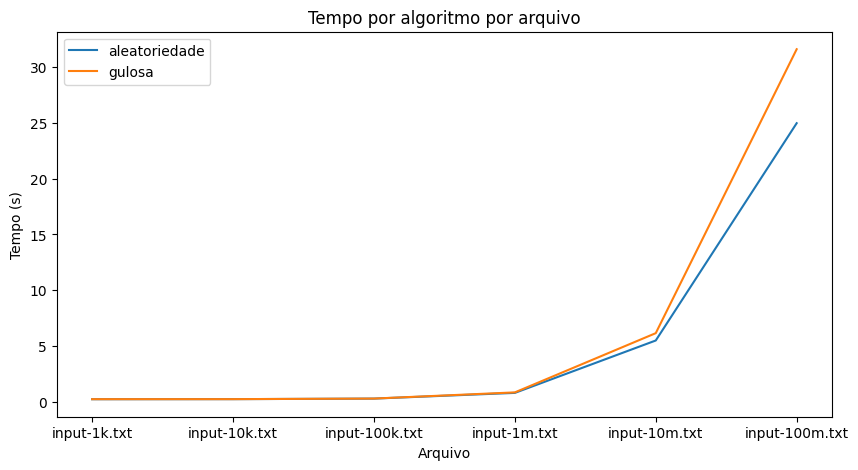

In [210]:
fig, ax = plt.subplots(figsize=(10, 5))
for algoritmo in df_mean['algoritmo'].unique():
    df_aux = df_mean[df_mean['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

Vemos que a estratégia aleatória possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input.

Isso deve-se ao fato de que a estratégia gulosa percorre todos os filmes até completar a Maratona de Filmes, procurando filmes que possam ser colocados nela. Já a estratégia aleatória, ao invés de percorrer todos os filmes, escolhe aleatoriamente um filme que pode ser colocado na Maratona de Filmes e o insere.

- Criando o Dataset para o gráfico de Filmes na Mochila vs Input

In [204]:
df_mean_movies = df.drop(columns=['tempo','tentativa'])
df_mean_movies = df_mean_movies.groupby(['algoritmo', 'arquivo']).mean().reset_index()
df_mean_movies

,algoritmo,arquivo,memoria
0,aleatoriedade,input-100k.txt,23.0
1,aleatoriedade,input-100m.txt,23.0
2,aleatoriedade,input-10k.txt,22.5
3,aleatoriedade,input-10m.txt,23.0
4,aleatoriedade,input-1k.txt,20.9
5,aleatoriedade,input-1m.txt,23.1
6,gulosa,input-100k.txt,24.0
7,gulosa,input-100m.txt,24.0
8,gulosa,input-10k.txt,24.0
9,gulosa,input-10m.txt,24.0


In [207]:
order_arquivos = list(data['gulosa'].keys())

df_mean_movies['arquivo'] = pd.Categorical(df_mean_movies['arquivo'], categories=order_arquivos, ordered=True)
df_mean_movies = df_mean_movies.sort_values(by=['arquivo'])
df_mean_movies

,algoritmo,arquivo,memoria
4,aleatoriedade,input-1k.txt,20.9
10,gulosa,input-1k.txt,22.0
2,aleatoriedade,input-10k.txt,22.5
8,gulosa,input-10k.txt,24.0
0,aleatoriedade,input-100k.txt,23.0
6,gulosa,input-100k.txt,24.0
5,aleatoriedade,input-1m.txt,23.1
11,gulosa,input-1m.txt,24.0
3,aleatoriedade,input-10m.txt,23.0
9,gulosa,input-10m.txt,24.0


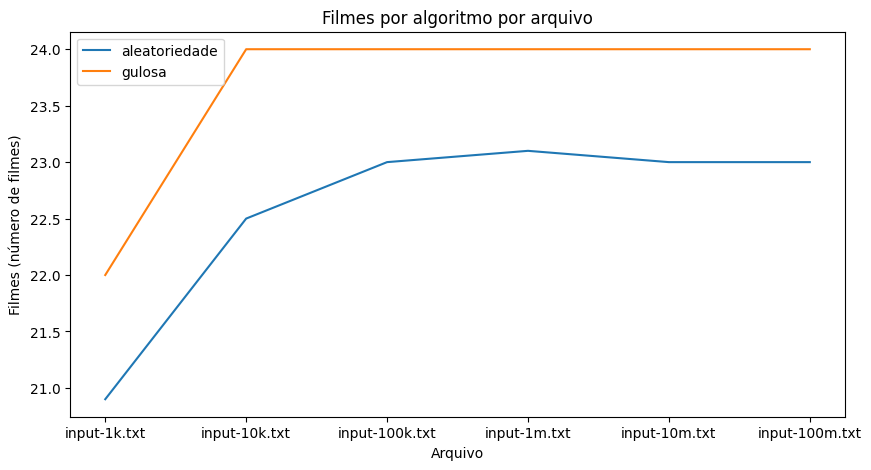

In [213]:
fig, ax = plt.subplots(figsize=(10, 5))

for algoritmo in df_mean_movies['algoritmo'].unique():
    df_aux = df_mean_movies[df_mean_movies['algoritmo'] == algoritmo]
    ax.plot(df_aux['arquivo'], df_aux['memoria'], label=algoritmo)

ax.set_title('Filmes por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Filmes (número de filmes)')
ax.legend()
plt.show()


Já no gráfico de Filmes na Mochila vs Input, vemos que a estratégia gulosa possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input. Isso deve-se ao fato de que a estratégia gulosa percorre todos os filmes até completar a Maratona de Filmes, procurando filmes que possam ser colocados nela. Já a estratégia aleatória, ao invés de percorrer todos os filmes, escolhe aleatoriamente um filme que pode ser colocado na Maratona de Filmes e o insere no bitset.

## Comparando categorias

Além disso, é possível comparar a quantidade de filmes por categoria que foram colocados na Maratona de Filmes.

Neste caso, serão utilizados 10000 filmes variando a quantidade de categorias de 1,2,3,4,5 e 10,20,30,50 e 100.

- **input-10k-1.txt**: contém 10000 filmes e 1 categoria.
- **input-10k-2.txt**: contém 10000 filmes e 2 categorias.
- **input-10k-3.txt**: contém 10000 filmes e 3 categorias.
- **input-10k-4.txt**: contém 10000 filmes e 4 categorias.
- **input-10k-5.txt**: contém 10000 filmes e 5 categorias.
- **input-10k-10.txt**: contém 10000 filmes e 10 categorias.
- **input-10k-20.txt**: contém 10000 filmes e 20 categorias.
- **input-10k-30.txt**: contém 10000 filmes e 30 categorias.
- **input-10k-50.txt**: contém 10000 filmes e 50 categorias.
- **input-10k-100.txt**: contém 10000 filmes e 100 categorias.

In [2]:
data_categoria = {
    'gulosa' : {
        'input-10k-1.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-2.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-3.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-4.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-5.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-10.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-20.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-30.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-50.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-75.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-100.txt': {
            'temmpo': 0,
            'categoria': 0
        },
    },
    'aleatoriedade': {
        'input-10k-1.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-2.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-3.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-4.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-5.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-10.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-20.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-30.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-50.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-75.txt': {
            'temmpo': 0,
            'categoria': 0
        },
        'input-10k-100.txt': {
            'temmpo': 0,
            'categoria': 0
        },
    }
}

In [5]:
for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        output_name = algoritmo + '_output_categoria_' + arquivo.split('-')[2]
        start_time = time.time()
        !./{algoritmo} < inputs/{arquivo} > outputs/{output_name}
        end_time = time.time() - start_time
        print('\tTime:', end_time)
        data_categoria[algoritmo][arquivo]['tempo'] = end_time
        data_categoria[algoritmo][arquivo]['memoria'] = number_of_movies(f'outputs/{output_name}')

	Time: 0.18789339065551758
	Time: 0.17771244049072266
	Time: 0.18178534507751465
	Time: 0.2030043601989746
	Time: 0.1878962516784668
	Time: 0.19562911987304688
	Time: 0.20332121849060059
	Time: 0.18252110481262207
	Time: 0.1889197826385498
	Time: 0.18184685707092285
	Time: 0.1851496696472168
	Time: 0.19526100158691406
	Time: 0.17992353439331055
	Time: 0.1908121109008789
	Time: 0.18128085136413574
	Time: 0.18855762481689453
	Time: 0.17961359024047852
	Time: 0.18418192863464355
	Time: 0.18409347534179688
	Time: 0.19077587127685547
	Time: 0.18141460418701172
	Time: 0.18612051010131836


In [6]:
df_categoria = pd.DataFrame(columns=['algoritmo', 'arquivo', 'categoria', 'tempo', 'memoria'])

for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        df_categoria = pd.concat([df_categoria, pd.DataFrame({
            'algoritmo': [algoritmo],
            'arquivo': [arquivo],
            'categoria': [int(arquivo.split('-')[2].split('.')[0])],
            'tempo': [data_categoria[algoritmo][arquivo]['tempo']],
            'memoria': [data_categoria[algoritmo][arquivo]['memoria']]
        })])

df_categoria

,algoritmo,arquivo,categoria,tempo,memoria
0,gulosa,input-10k-1.txt,1,0.187893,1
0,gulosa,input-10k-2.txt,2,0.177712,2
0,gulosa,input-10k-3.txt,3,0.181785,6
0,gulosa,input-10k-4.txt,4,0.203004,11
0,gulosa,input-10k-5.txt,5,0.187896,15
0,gulosa,input-10k-10.txt,10,0.195629,24
0,gulosa,input-10k-20.txt,20,0.203321,24
0,gulosa,input-10k-30.txt,30,0.182521,24
0,gulosa,input-10k-50.txt,50,0.188920,24
0,gulosa,input-10k-75.txt,75,0.181847,24


- Criando o Dataset para o gráfico de Tempo vs Categorias

In [7]:
df_categoria_mean = df_categoria.drop(columns=['memoria'])
df_categoria_mean = df_categoria_mean.groupby(['algoritmo', 'arquivo', 'categoria']).mean().reset_index()
df_categoria_mean = df_categoria_mean.sort_values(by=['algoritmo','categoria'])
df_categoria_mean

,algoritmo,arquivo,categoria,tempo
0,aleatoriedade,input-10k-1.txt,1,0.195261
3,aleatoriedade,input-10k-2.txt,2,0.179924
5,aleatoriedade,input-10k-3.txt,3,0.190812
7,aleatoriedade,input-10k-4.txt,4,0.181281
8,aleatoriedade,input-10k-5.txt,5,0.188558
1,aleatoriedade,input-10k-10.txt,10,0.179614
4,aleatoriedade,input-10k-20.txt,20,0.184182
6,aleatoriedade,input-10k-30.txt,30,0.184093
9,aleatoriedade,input-10k-50.txt,50,0.190776
10,aleatoriedade,input-10k-75.txt,75,0.181415


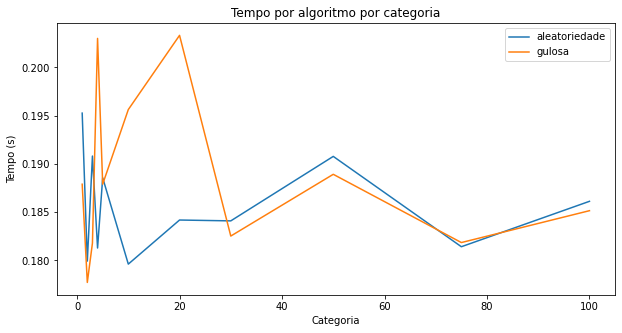

In [8]:
# plotar o tempo por categoria
fig, ax = plt.subplots(figsize=(10, 5))

for algoritmo in df_categoria_mean['algoritmo'].unique():
    df_aux = df_categoria_mean[df_categoria_mean['algoritmo'] == algoritmo]
    ax.plot(df_aux['categoria'], df_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

Ao tentar analisar o gráfico de Tempo vs Categorias, não se pode observar uma tendência clara, pois o tempo de execução é muito variável.

## Analisando filmes por categoria

- Funções auxiliares

In [63]:
def get_all_filmes(arquivo, arquivo_name, algoritmo):
    with open(arquivo, 'r') as f:
        lines = f.readlines()
        filmes = []
        for line in lines:
            line_split = line.split(' ')
            if len(line_split) < 4:
                continue
            filme = {
                'id': int(line_split[0]),
                'inicio': int(line_split[1]),
                'fim': int(line_split[2]),
                'categoria': int(line_split[3].split('\n')[0]),
                'arquivo': arquivo_name,
                'algoritmo': algoritmo
            }
            filmes.append(filme)
        return filmes

- Gerando um dataset dos filmes por diferentes números de categorias

In [64]:
df_filmes = pd.DataFrame(columns=['id', 'inicio', 'fim', 'categoria', 'arquivo', 'algoritmo'])

for algoritmo in data_categoria:
    for arquivo in data_categoria[algoritmo]:
        output_name = 'outputs/'+algoritmo + '_output_categoria_' + arquivo.split('-')[2]
        filmes = get_all_filmes(output_name, arquivo, algoritmo)
        df_filmes = pd.concat([df_filmes, pd.DataFrame(filmes)])

In [65]:
df_filmes

,id,inicio,fim,categoria,arquivo,algoritmo
0,5058,0,0,1,input-10k-1.txt,gulosa
0,249,0,0,2,input-10k-2.txt,gulosa
1,7652,1,1,1,input-10k-2.txt,gulosa
0,745,0,0,1,input-10k-3.txt,gulosa
1,6509,1,1,1,input-10k-3.txt,gulosa
...,...,...,...,...,...,...
17,8282,19,20,71,input-10k-100.txt,aleatoriedade
18,1339,20,21,5,input-10k-100.txt,aleatoriedade
19,7699,21,22,48,input-10k-100.txt,aleatoriedade
20,464,22,23,94,input-10k-100.txt,aleatoriedade


- Salvar os dados em um arquivo csv


In [27]:
df_filmes.to_csv('df_filmes_categoria.csv', index=False)

In [66]:
# carrgar o arquivo
df_filmes = pd.read_csv('df_filmes_categoria.csv')
df_filmes

,id,inicio,fim,categoria,arquivo,algoritmo
0,5058,0,0,1,input-10k-1.txt,gulosa
1,249,0,0,2,input-10k-2.txt,gulosa
2,7652,1,1,1,input-10k-2.txt,gulosa
3,745,0,0,1,input-10k-3.txt,gulosa
4,6509,1,1,1,input-10k-3.txt,gulosa
...,...,...,...,...,...,...
343,8282,19,20,71,input-10k-100.txt,aleatoriedade
344,1339,20,21,5,input-10k-100.txt,aleatoriedade
345,7699,21,22,48,input-10k-100.txt,aleatoriedade
346,464,22,23,94,input-10k-100.txt,aleatoriedade


In [67]:
df_filmes_count = df_filmes.drop(columns=['id', 'inicio', 'fim'])
df_filmes_count = df_filmes_count.groupby(['algoritmo', 'arquivo', 'categoria']).count().reset_index()
df_filmes_count = df_filmes_count.sort_values(by=['algoritmo','categoria'])
df_filmes_count

,algoritmo,arquivo,categoria
0,aleatoriedade,input-10k-1.txt,1
29,aleatoriedade,input-10k-2.txt,1
31,aleatoriedade,input-10k-20.txt,1
46,aleatoriedade,input-10k-3.txt,1
49,aleatoriedade,input-10k-30.txt,1
...,...,...,...
139,gulosa,input-10k-100.txt,79
140,gulosa,input-10k-100.txt,83
141,gulosa,input-10k-100.txt,96
142,gulosa,input-10k-100.txt,98


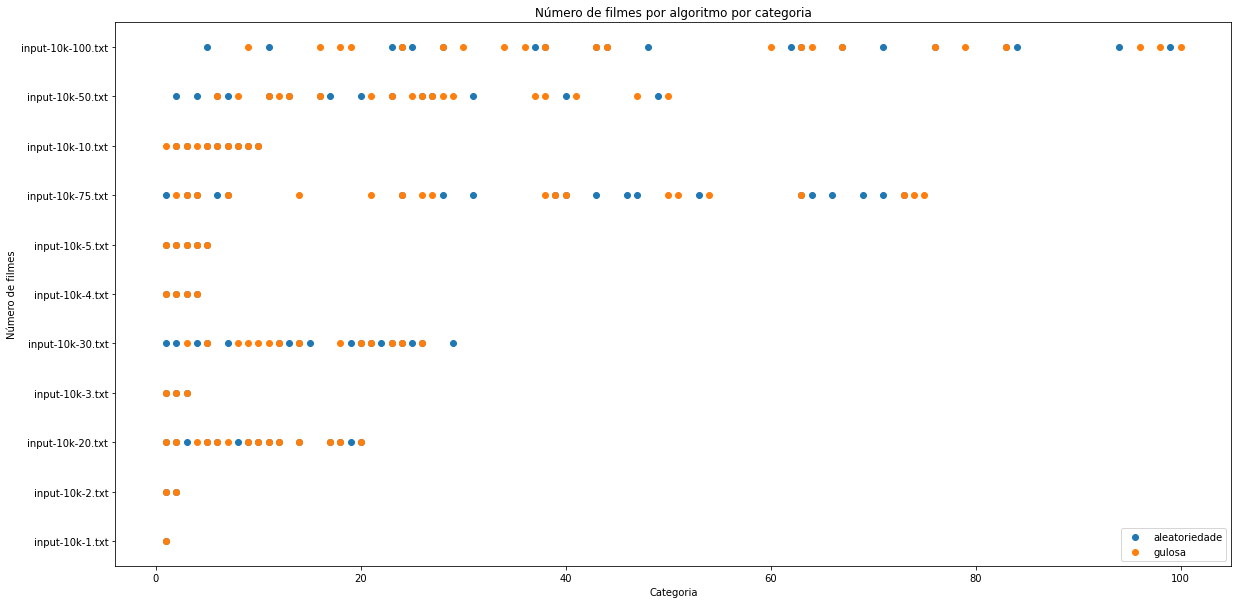

In [75]:
# plotar grafico de dispersão

import numpy as np
fig, ax = plt.subplots(figsize=(20, 10))

for algoritmo in df_filmes_count['algoritmo'].unique():
    # plotar os pontos
    df_aux = df_filmes_count[df_filmes_count['algoritmo'] == algoritmo]
    ax.scatter(df_aux['categoria'], df_aux['arquivo'], label=algoritmo)


ax.set_title('Número de filmes por algoritmo por categoria')
ax.set_xlabel('Categoria')
ax.set_ylabel('Número de filmes')
ax.legend()
plt.show()


Com esta distribuição, pode-se ver que a quantidade de filmes por categoria vs quantidade de categorias pouco influencia na quantidade de filmes que serão colocados na Maratona de Filmes conforme o número de categorias aumenta. 

## Conclusões

Podemos conferir que, a partir destes resultados, não basta apenas escolher um algoritmo para resolver um problema, mas sim, analisar o cenário e escolher o algoritmo que melhor se encaixa.

Caso o problema seja assistir a maior quantidade de filmes, no caso da Maratona de Filmes, podemos utilizar algoritmos como o guloso, e que possui uma vantagem maior quando temos um cenário de mais fimes no nosso arquivo de input.

Caso o problema seja a otimização do tempo do algoritmo, podemos utilizar algoritmos como o aleatório, e que possui uma vantagem maior quando temos um cenário de mais fimes.

Além disso, com estes dados, conseguimos comparar o balanceamento de duas abordagens distintas: exploitation e exploration. No exploitation, o foco é dado a uma única propriedade determinística, que leva a soluções consistentes, porém, pode demandar mais tempo, neste caso. Por outro lado, no exploration, há liberdade para escolhas aleatórias, o que pode levar a soluções mais otimizadas em relação ao tempo, porém, com uma consistência no preenchimento total da Maratona menor.

# Busca exaustiva com OpenMP e GPU

As abordagens anteriormente utilizadas para resolver o problema da Maratona de Filmes foram o algoritmo guloso e o algoritmo aleatório. Ambos os algoritmos possuem suas vantagens e desvantagens, como já foi discutido anteriormente. Porém, há uma terceira abordagem que pode ser utilizada para resolver o problema: a busca exaustiva.

A busca exaustiva é uma abordagem que consiste em testar todas as possibilidades de solução para um problema, e escolher a melhor solução dentre todas as possibilidades. No caso da Maratona de Filmes, a busca exaustiva consiste em testar todas as possibilidades de filmes que podem ser colocados na Maratona de Filmes, e escolher a melhor solução dentre todas as possibilidades.

Porém, a busca exaustiva possui uma desvantagem: o tempo de execução. Como a busca exaustiva testa todas as possibilidades de solução, o tempo de execução pode ser muito alto, dependendo do tamanho do problema. Por exemplo, se tivermos 100 filmes, o número de possibilidades de filmes que podem ser colocados na Maratona de Filmes é 2^100, o que é um número muito grande.

Porém, há uma forma de melhorar o tempo de execução da busca exaustiva: paralelização. A paralelização consiste em dividir o problema em partes menores, e resolver cada parte em um processador diferente. No caso da Maratona de Filmes, podemos dividir o problema em partes menores, e resolver cada parte em um processador diferente. Por exemplo, se tivermos 100 filmes, podemos dividir o problema em 10 partes, e resolver cada parte em um processador diferente. Dessa forma, o tempo de execução da busca exaustiva é reduzido.

## Busca exaustiva com OpenMP

O OpenMP é uma API que permite a paralelização de programas em C/C++. Para utilizar o OpenMP, é necessário adicionar algumas diretivas ao código, que indicam quais partes do código devem ser paralelizadas. No caso da Maratona de Filmes, a busca exaustiva pode ser paralelizada, pois é possível dividir o problema em partes menores, e resolver cada parte em um processador diferente.

Até aquele momento, haviam sido experimentadas heurísticas que visavam resolver o problema em um tempo razoável, sem oferecer garantias de otimalidade. Agora, surge a necessidade de incorporar o paralelismo de tarefas nas alternativas de resolução.

Com o objetivo de introduzir o paralelismo, a implementação exaustiva precisará ser modificada. A diretiva ``#pragma omp parallel for`` pode ser utilizada para distribuir as iterações de um loop entre as threads disponíveis. Dentro desse loop, cada filme pode ser verificado individualmente e, caso esteja dentro das restrições de horário e categoria, uma variável compartilhada chamada ``"count"`` será incrementada. É importante ressaltar que, por se tratar de uma variável compartilhada, a região crítica precisa ser preservada entre as threads.

É relevante destacar que a utilização do OpenMP não necessariamente garantirá um melhor desempenho, pois a paralelização implica em um overhead que pode diminuir o desempenho do programa em alguns casos. É fundamental realizar testes para verificar se a utilização do OpenMP é verdadeiramente benéfica para o problema em questão.

### Código

Abaixo, a explicação por partes principais do código:

#### Bibliotecas

```cpp
#include <iostream>
#include <vector>
#include <algorithm>
#include <iomanip>
#include <bitset>

#include <cmath>
#include <stack>
#include <omp.h>
```

São as bibliotecas padrões da linguagem C++. `iostream` é para entrada e saída de dados, ``vector`` é para armazenar listas de objetos, ``algorithm`` é para algoritmos de ordenação e outras operações em contêineres, ``iomanip`` é para manipulação de fluxos de saída e ``bitset`` é para manipulação de bits. ``cmath`` é para funções matemáticas, ``stack`` é para pilhas e ``omp.h`` é para paralelismo com OpenMP.

#### Estruturas de Dados

```cpp
struct Filme {
    int id;
    int inicio;
    int fim;
    int categoria;
    std::bitset<24> horario;
};

struct Categoria {
    int id;
    int quantidade;
};

struct Maratona {
    std::bitset<24> disponibilidade;
    std::vector<Filme> filmes;
};
```

São as estruturas de dados utilizadas no código. A estrutura ``Filme`` armazena as informações de cada filme, como id, horário de início e fim e categoria. A estrutura ``Categoria`` armazena o id e a quantidade de filmes de cada categoria. A estrutura ``Maratona`` armazena a disponibilidade de horários da maratona e os filmes selecionados.

#### Funções Auxiliares

```cpp
std::bitset<24> gera_horario(int inicio, int fim) {
    std::bitset<24> horario;

    if (inicio == fim) {
        horario.set(inicio);
        return horario;
    }
    
    for (int i = inicio; i < fim; i++) {
        horario.set(i);
    }

    return horario;
}
```

A função ``gera_horario`` recebe o horário de início e fim de um filme e retorna um std::bitset<24> com os bits correspondentes ao horário ocupado pelo filme. 

#### Função Principal

```cpp
int main() {
    int n, m;
    cin >> n >> m; // lê o número de filmes e de categorias
    vector<Filme> filmes(n); // cria um vetor de filmes com tamanho n
    vector<Categoria> categorias(m); // cria um vetor de categorias com tamanho m
    Maratona maratona; // cria uma maratona

    // Lê a quantidade de filmes de cada categoria
    for (int i = 0; i < m; i++) {
        cin >> categorias[i].quantidade;
        categorias[i].id = i + 1;
    }

    // Lê as informações dos filmes
    for (int i = 0; i < n; i++) {
        int inicio, fim, categoria;
        cin >> inicio >> fim >> categoria;

        // Se o horário de início é maior que o horário de fim,
        // significa que o filme se estende até o dia seguinte
        if (inicio > fim) {
            if (fim == 0) {
                fim = 24;
            } else if (inicio == -1 || fim == -1) {
                continue; // Ignora filmes com horários inválidos
            } else {
                continue; // Ignora filmes com horários inválidos
            }
        }

        // Cria um filme com as informações lidas
        Filme filme;
        filme.id = i + 1;
        filme.inicio = inicio;
        filme.fim = fim;
        filme.categoria = categoria;
        filme.horario = gera_horario(inicio, fim);

        // Adiciona o filme ao vetor de filmes
        filmes.push_back(filme);
    }

    // Chamada da função de busca exaustiva
    busca_exaustiva(filmes, categorias, maratona);

    return 0;
}
```

#### Busca Exaustiva

```cpp
void busca_exaustiva(vector<Filme> &filmes, vector<Categoria> &categorias, Maratona &maratona)
{
    int maximo = 0;
    int size_of_filmes = filmes.size();
    cout << "Quantidade total de filmes: " << size_of_filmes << endl;

    long int todas_combinacoes = pow(2, size_of_filmes);
    cout << "Quantidade total de combinações: " << todas_combinacoes << endl;
    long int i;

#pragma omp parallel for
    for (i = 0; i < todas_combinacoes; i++)
    {
        int num_films = 0;
        vector<int> categorias_vistas(categorias.size(), 0);
        stack<Filme> filmes_vistos;
        Maratona maratona_atual;

        bitset<64> filmes_vector(i);
        bitset<64> aux = filmes_vector;

        for (int j = 0; j < size_of_filmes; j++)
        {
            if (aux[j] == 1)
            {
                if ((maratona_atual.disponibilidade & filmes[j].horario) == 0)
                {
                    num_films++;
                    filmes_vistos.push(filmes[j]);
                    maratona_atual.disponibilidade |= filmes[j].horario;
                    categorias_vistas[filmes[j].categoria - 1]++;
                }

                aux[j] = 0;
            }
        }

#pragma omp critical
        if (num_films > maximo)
        {
            maximo = num_films;
            maratona.filmes.clear();
            maratona.disponibilidade.reset();

            while (!filmes_vistos.empty())
            {
                Filme filme = filmes_vistos.top();
                filmes_vistos.pop();
                maratona.filmes.push_back(filme);
                maratona.disponibilidade |= filme.horario;
            }
        }
    }

    cout << "Quantidade máxima possível: " << maximo << endl;

    for (int i = 0; i < maximo; i++)
    {
        cout << "Filme: [" << maratona.filmes[i].id << "] " << maratona.filmes[i].inicio << " " << maratona.filmes[i].fim << " " << maratona.filmes[i].categoria << endl;
    }
}
```

A função ``busca_exaustiva`` é responsável por realizar a busca exaustiva para encontrar a melhor combinação de filmes em uma maratona. Vamos analisar passo a passo o que essa função faz:

1. A função recebe como parâmetros um vetor de filmes (``filmes``), um vetor de categorias (``categorias``) e um objeto Maratona vazio (``maratona``).

2. É declarada uma variável ``maximo`` para armazenar o número máximo de filmes que podem ser incluídos na maratona.

3. O tamanho do vetor ``filmes`` é armazenado na variável ``size_of_filmes``.

4. É exibida na tela a quantidade total de filmes.

5. É calculado o número total de combinações possíveis usando a fórmula 2^N, onde N é o número de filmes. Essa quantidade é armazenada na variável ``todas_combinacoes``.

6. É exibida na tela a quantidade total de combinações.

7. Inicia-se um loop paralelo usando a diretiva ``#pragma omp parallel for``, que itera sobre todas as combinações possíveis.

8. Dentro do loop, são declaradas variáveis locais para contar o número de filmes selecionados (``num_films``), um vetor para registrar quantas categorias foram vistas (``categorias_vistas``), uma pilha de filmes selecionados (``filmes_vistos``) e um objeto Maratona temporário (``maratona_atual``).

9. Um objeto ``bitset`` chamado ``filmes_vector`` é criado a partir do número da iteração atual (``i``). Esse bitset é utilizado para determinar quais filmes serão selecionados na combinação atual.

10. Um loop ``for`` itera sobre os filmes do vetor ``filmes``.

11. Dentro do loop, é verificado se o bit correspondente em ``filmes_vector`` é igual a 1. Se for, significa que esse filme deve ser selecionado.

12. É verificado se o horário do filme não conflita com os filmes já selecionados na maratona atual. Isso é feito comparando o bitset de horário do filme com o bitset de disponibilidade da maratona atual (``maratona_atual.disponibilidade``). Se não houver conflito, o filme é considerado válido.

13. Se o filme for válido, incrementa-se o número de filmes selecionados (``num_films``), adiciona-se o filme à pilha ``filmes_vistos``, atualiza-se o bitset de disponibilidade da maratona atual e registra-se que uma categoria foi vista incrementando o valor correspondente no vetor ``categorias_vistas``.

14. O bit correspondente em ``aux`` é setado como 0, indicando que esse filme já foi selecionado.

15. Após o loop, é verificado se o número de filmes selecionados (``num_films``) é maior que o número máximo encontrado até o momento (``maximo``). Se for, significa que essa combinação de filmes é a melhor até agora, então o número máximo é atualizado, e as informações da maratona atual são copiadas para o objeto ``maratona``.

16. Após o loop paralelo, o número máximo possível de filmes é exibido na tela.

17. É exibida na tela a lista de filmes selecionados na maratona, com o ID, horário de início, horário de fim e categoria de cada filme.

Essa função utiliza paralelismo para acelerar a busca exaustiva, dividindo as combinações entre diferentes threads. Cada thread avalia uma parte das combinações e, ao final, o resultado é combinado para obter a melhor maratona possível.

## Busca exaustiva com GPU

A GPU é um processador gráfico que pode ser utilizado para acelerar o processamento de programas. Para utilizar a GPU, é necessário adicionar algumas diretivas ao código, que indicam quais partes do código devem ser executadas na GPU. No caso da Maratona de Filmes, a busca exaustiva pode ser executada na GPU, pois é possível dividir o problema em partes menores, e resolver cada parte em um processador diferente.

### Código

Abaixo, a explicação por partes principais do código:

#### Bibliotecas

```cpp
#include <iostream>
#include <vector>

#include <thrust/host_vector.h>
#include <thrust/sequence.h>
#include <thrust/device_vector.h>
#include <thrust/functional.h>
#include <thrust/copy.h>
```

- ``<iostream>``: Fornece recursos para entrada e saída de dados no console.
- ``<vector>``: Fornece a classe de vetor para manipulação de sequências dinâmicas.
- ``<thrust/host_vector.h>``: Fornece a classe host_vector do Thrust, que representa um vetor hospedado na memória do sistema.
- ``<thrust/sequence.h>``: Fornece a função sequence do Thrust, que preenche um intervalo com uma sequência de valores.
- ``<thrust/device_vector.h>``: Fornece a classe device_vector do Thrust, que representa um vetor hospedado na memória da GPU.
- ``<thrust/functional.h>``: Fornece funções e operadores funcionais para serem usados com algoritmos do Thrust.
- ``<thrust/copy.h>``: Fornece a função copy do Thrust, que copia elementos de uma sequência de origem para uma sequência de destino.

#### Estruturas de Dados

```cpp
struct Filme
{
  int id;
  int inicio;
  int fim;
  int categoria;
};
```

A estrutura ``Filme`` armazena as informações de cada filme, como id, horário de início e fim e categoria.

#### Funções Auxiliares

```cpp
void preenche_horarios(int &horarios_disponiveis, int inicio, int fim)
{
  for (int i = inicio; i < fim; i++)
  {
    horarios_disponiveis |= (1 << i);
  }
}
```

A função ``preenche_horarios`` Preenche um valor inteiro com os bits correspondentes aos horários disponíveis para um filme, com base nos horários de início e término fornecidos.

#### Função Principal

```cpp
int main()
{
  int n, m;
  cin >> n >> m;
  
  // Declaração das variáveis e containers utilizados no programa
  vector<Filme> vetor_filmes;
  thrust::host_vector<int> disponibilidade_categoria(m);

  // Leitura da disponibilidade de cada categoria
  for (int i = 0; i < m; i++)
  {
    cin >> disponibilidade_categoria[i];
  }

  // Leitura dos dados dos filmes
  for (int i = 0; i < n; i++)
  {
    int inicio, fim, categoria;
    cin >> inicio >> fim >> categoria;

    // Tratamento especial para casos em que o início é maior que o fim
    if (inicio > fim)
    {
      if (fim == 0)
      {
        fim = 24;
      }
      else if (inicio == -1 || fim == -1)
      {
        continue;
      }
      else
      {
        continue;
      }
    }

    // Criação de um objeto Filme e adição ao vetor_filmes
    Filme filme;
    filme.id = i + 1;
    filme.inicio = inicio;
    filme.fim = fim;
    filme.categoria = categoria;

    vetor_filmes.push_back(filme);
  }

  int n_filmes = vetor_filmes.size();

  // Criação de vetores host para armazenar os dados dos filmes
  thrust::host_vector<int> categoria_filmes(n_filmes);
  thrust::host_vector<int> horarios_filmes_cpu(n_filmes);

  // Preenchimento dos vetores de horários e categorias dos filmes
  for (int i = 0; i < n_filmes; i++)
  {
    horarios_filmes_cpu[i] = 0;
    preenche_horarios(horarios_filmes_cpu[i],
                      vetor_filmes[i].inicio,
                      vetor_filmes[i].fim);
    categoria_filmes[i] = vetor_filmes[i].categoria;
  }

  // Criação de vetores device para armazenar os dados dos filmes
  thrust::device_vector<int> vetor_possibilidades_gpu(pow(2, n_filmes));

  // Preenchimento do vetor de possibilidades com valores sequenciais
  thrust::sequence(vetor_possibilidades_gpu.begin(), vetor_possibilidades_gpu.end());

  thrust::device_vector<int> disponibilidade_categoria_gpu(disponibilidade_categoria);
  thrust::device_vector<int> horarios_filmes_gpu(horarios_filmes_cpu);
  thrust::device_vector<int> categoria_filmes_gpu(categoria_filmes);

  // Execução do kernel de busca exaustiva na GPU
  thrust::transform(
      vetor_possibilidades_gpu.begin(),
      vetor_possibilidades_gpu.end(),
      vetor_possibilidades_gpu.begin(),
      busca_exaustiva_gpu(n_filmes,
                          m,
                          raw_pointer_cast(disponibilidade_categoria_gpu.data()),
                          raw_pointer_cast(horarios_filmes_gpu.data()),
                          raw_pointer_cast(categoria_filmes_gpu.data())));

  // Copia do resultado da GPU para a CPU
  thrust::host_vector<int> config_vector_cpu_final = vetor_possibilidades_gpu;

  // Encontra o valor máximo no vetor de configurações
  int max_count = *thrust::max_element(config_vector_cpu_final.begin(), config_vector_cpu_final.end());

  cout << max_count << endl;

  int max_config = -1;
  for (int i = 0; i < config_vector_cpu_final.size(); i++)
  {
    // Encontra a primeira configuração que possui o valor máximo
    if (config_vector_cpu_final[i] == max_count)
    {
      max_config = i;
      break;
    }
  }

  // Imprime os filmes da configuração com o valor máximo
  for (int i = 0; i < n_filmes; i++)
  {
    if (max_config & (1 << i))
    {
      cout << vetor_filmes[i].id << " " << vetor_filmes[i].inicio << " " << vetor_filmes[i].fim << " " << vetor_filmes[i].categoria << endl;
    }
  }

  return 0;
}
```

#### Busca Exaustiva em GPU

```cpp
struct busca_exaustiva_gpu
{
  int n_filmes;  // Número de filmes
  int m_categorias;  // Número de categorias

  int *disponibilidade_categoria;  // Ponteiro para o array de disponibilidade de categorias
  int *horarios_filmes;  // Ponteiro para o array de horários dos filmes
  int *categoria_filmes;  // Ponteiro para o array de categorias dos filmes

  busca_exaustiva_gpu(int n_filmes_,
                      int m_categorias_,
                      int *disponibilidade_categoria_,
                      int *horarios_filmes_,
                      int *categoria_filmes_)
      : n_filmes(n_filmes_),
        m_categorias(m_categorias_),
        disponibilidade_categoria(disponibilidade_categoria_),
        horarios_filmes(horarios_filmes_),
        categoria_filmes(categoria_filmes_)
  {
  }

  __device__ int operator()(const int &config)
  {
    int horarios_disponiveis = 0;  // Variável para acompanhar os horários disponíveis
    int categorias_vistas[16];  // Array para acompanhar as categorias vistas

    // Inicializa o array de categorias vistas com os valores de disponibilidade_categoria
    for (int i = 0; i < m_categorias; i++)
    {
      categorias_vistas[i] = disponibilidade_categoria[i];
    }

    int num_filmes = 0;  // Contador de filmes selecionados
    for (int i = 0; i < n_filmes; i++)
    {
      if (config & (1 << i))
      {
        // Verifica se a categoria do filme está disponível
        if (categorias_vistas[categoria_filmes[i] - 1] > 0)
        {
          // Verifica se há conflito de horários com filmes já selecionados
          int horario_analisado = horarios_disponiveis & horarios_filmes[i];
          if (horario_analisado != 0)
            return false;  // Retorna falso se houver conflito de horários

          categorias_vistas[categoria_filmes[i] - 1]--;  // Decrementa a contagem de categorias vistas
          horarios_disponiveis |= horarios_filmes[i];  // Atualiza os horários disponíveis
          num_filmes++;  // Incrementa o contador de filmes selecionados
        }
      }
    }

    return num_filmes;  // Retorna o número de filmes selecionados
  }
};
```

- ``struct busca_exaustiva_gpu``: Sobrecarrega o operador de função ``()`` para criar um objeto função que será usado na transformação do Thrust. Essa estrutura contém os seguintes atributos:
- ``n_filmes``: Número de filmes.
- ``m_categorias``: Número de categorias.
- ``disponibilidade_categoria``: Vetor de disponibilidade de categorias.
- ``horarios_filmes``: Vetor de horários dos filmes.
- ``categoria_filmes``: Vetor de categorias dos filmes.
- O operador de função ``()`` realiza a busca exaustiva em uma configuração específica de filmes, verificando as restrições de disponibilidade de horários e categorias. Retorna o número de filmes assistidos se a configuração for válida, caso contrário, retorna falso.

## Comparando os resultados

Antes, é importante realizar o entendimento a seguir:

### Arquivos de Input

Todos os arquivos de input possuem 5 categorias.

- **input-12.txt**: contém 12 filmes.
- **input-16.txt**: contém 16 filmes.
- **input-20.txt**: contém 20 filmes.
- **input-24.txt**: contém 24 filmes.
- **input-28.txt**: contém 28 filmes.
- **input-30.txt**: contém 30 filmes.

### Compilação

- g++ -Wl,-z,stack-size=33554432 -fopenmp exaustiva.cpp -o exaustiva
- g++ -Wall -O3 -g exaustiva_thrust.cpp -o exaustiva_thrust

### Execução

Exemplos: 
- ./exaustiva inputs/< input-12.txt > outputs/output-exaustiva-12.txt
- ./exaustiva_thrust inputs/< input-12.txt > outputs/output-exaustiva_thrust-12.txt

- Importando bibliotecas

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

- Funções auxiliares

In [3]:
def number_of_movies(file):
    with open(file, 'r') as f:
        line = f.readline().split()
        return int(line[0])

- Criando uma estrutura de dados para armazenar os dados de cada execução

In [9]:
data_paralelismo = {
    'exaustiva' : {
        'input-12.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-16.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-20.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-24.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-28.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-30.txt': {
            'tempo': [],
            'memoria': []
        },
    },
    'exaustiva_thrust' : {
        'input-12.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-16.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-20.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-24.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-28.txt': {
            'tempo': [],
            'memoria': []
        },
        'input-30.txt': {
            'tempo': [],
            'memoria': []
        },
    },
}

- Realizando o loop para cada arquivo de input e cada algoritmo

Abaixo, serão realizadas 5 interações para cada arquivo de input e cada algoritmo, e os resultados serão salvos em um arquivo de texto logo após.

In [10]:
for algoritmo in data_paralelismo:
    for arquivo in data_paralelismo[algoritmo]:
        for i in range(5):
            print(f'{algoritmo} - {arquivo} - {i+1}/5')
            output_name = str(i) + '_' + arquivo.split('-')[1]
            start_time = time.time()
            !./{algoritmo} < inputs/{arquivo} > outputs/{algoritmo}_output_{output_name}
            end_time = time.time() - start_time
            print('\tTime:', end_time)
            data_paralelismo[algoritmo][arquivo]['tempo'].append(end_time)
            data_paralelismo[algoritmo][arquivo]['memoria'].append(number_of_movies(f'outputs/{algoritmo}_output_{output_name}'))           

exaustiva - input-12.txt - 1/5
	Time: 0.16165590286254883
exaustiva - input-12.txt - 2/5
	Time: 0.16406536102294922
exaustiva - input-12.txt - 3/5
	Time: 0.15300250053405762
exaustiva - input-12.txt - 4/5
	Time: 0.1678001880645752
exaustiva - input-12.txt - 5/5
	Time: 0.16382884979248047
exaustiva - input-16.txt - 1/5
	Time: 0.1630539894104004
exaustiva - input-16.txt - 2/5
	Time: 0.16482138633728027
exaustiva - input-16.txt - 3/5
	Time: 0.16330385208129883
exaustiva - input-16.txt - 4/5
	Time: 0.15016913414001465
exaustiva - input-16.txt - 5/5
	Time: 0.17291498184204102
exaustiva - input-20.txt - 1/5
	Time: 0.21880006790161133
exaustiva - input-20.txt - 2/5
	Time: 0.23344206809997559
exaustiva - input-20.txt - 3/5
	Time: 0.22489500045776367
exaustiva - input-20.txt - 4/5
	Time: 0.23521184921264648
exaustiva - input-20.txt - 5/5
	Time: 0.21454620361328125
exaustiva - input-24.txt - 1/5
	Time: 1.2353131771087646
exaustiva - input-24.txt - 2/5
	Time: 1.4138154983520508
exaustiva - input-

- Salvando os resultados em um arquivo JSON para serem utilizados no gráfico em outro momento

In [11]:
import json

with open('data_paralelismo.json', 'w') as fp:
    json.dump(json.dumps(data_paralelismo, indent=2), fp)

- Gerando o DataFrame para ser utilizado no gráfico

In [14]:
df_paralelismo = pd.DataFrame(columns=['algoritmo', 'arquivo', 'tentativa', 'tempo', 'memoria'])

for algoritmo in data_paralelismo:
    for arquivo in data_paralelismo[algoritmo]:
        for i in range(5):
            df_paralelismo = pd.concat([df_paralelismo, pd.DataFrame({
                'algoritmo': [algoritmo],
                'arquivo': [arquivo],
                'tentativa': [i+1],
                'tempo': [data_paralelismo[algoritmo][arquivo]['tempo'][i]],
                'memoria': [data_paralelismo[algoritmo][arquivo]['memoria'][i]]
            })])

df_paralelismo

,algoritmo,arquivo,tentativa,tempo,memoria
0,exaustiva,input-12.txt,1,0.161656,5
0,exaustiva,input-12.txt,2,0.164065,5
0,exaustiva,input-12.txt,3,0.153003,5
0,exaustiva,input-12.txt,4,0.167800,5
0,exaustiva,input-12.txt,5,0.163829,5
0,exaustiva,input-16.txt,1,0.163054,5
0,exaustiva,input-16.txt,2,0.164821,5
0,exaustiva,input-16.txt,3,0.163304,5
0,exaustiva,input-16.txt,4,0.150169,5
0,exaustiva,input-16.txt,5,0.172915,5


- Salvando o DataFrame em um arquivo CSV

In [15]:
df_paralelismo.to_csv('data_paralelismo.csv', index=False)

In [16]:
df_paralelismo.head(10)

,algoritmo,arquivo,tentativa,tempo,memoria
0,exaustiva,input-12.txt,1,0.161656,5
0,exaustiva,input-12.txt,2,0.164065,5
0,exaustiva,input-12.txt,3,0.153003,5
0,exaustiva,input-12.txt,4,0.167800,5
0,exaustiva,input-12.txt,5,0.163829,5
0,exaustiva,input-16.txt,1,0.163054,5
0,exaustiva,input-16.txt,2,0.164821,5
0,exaustiva,input-16.txt,3,0.163304,5
0,exaustiva,input-16.txt,4,0.150169,5
0,exaustiva,input-16.txt,5,0.172915,5


### Média de Tempo por arquivo por algoritmo

In [17]:
df_paralelismo_mean = df_paralelismo.groupby(['algoritmo', 'arquivo']).mean(numeric_only=True).reset_index()
df_paralelismo_mean

,algoritmo,arquivo,tempo
0,exaustiva,input-12.txt,0.162071
1,exaustiva,input-16.txt,0.162853
2,exaustiva,input-20.txt,0.225379
3,exaustiva,input-24.txt,1.331152
4,exaustiva,input-28.txt,10.033743
5,exaustiva,input-30.txt,305.309245
6,exaustiva_thrust,input-12.txt,0.312712
7,exaustiva_thrust,input-16.txt,0.299725
8,exaustiva_thrust,input-20.txt,0.311796
9,exaustiva_thrust,input-24.txt,0.425700


### Gráfico de tempo

In [18]:
df_paralelismo_mean.sort_values(by=['tempo'], inplace=True)

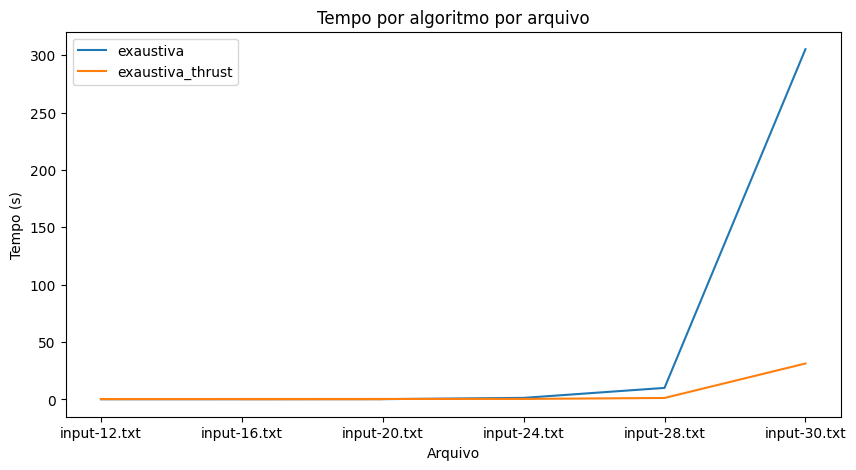

In [19]:
fig, ax = plt.subplots(figsize=(10, 5))
for algoritmo in df_paralelismo_mean['algoritmo'].unique():
    df_paralelismo_aux = df_paralelismo_mean[df_paralelismo_mean['algoritmo'] == algoritmo]
    ax.plot(df_paralelismo_aux['arquivo'], df_paralelismo_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.legend()
plt.show()

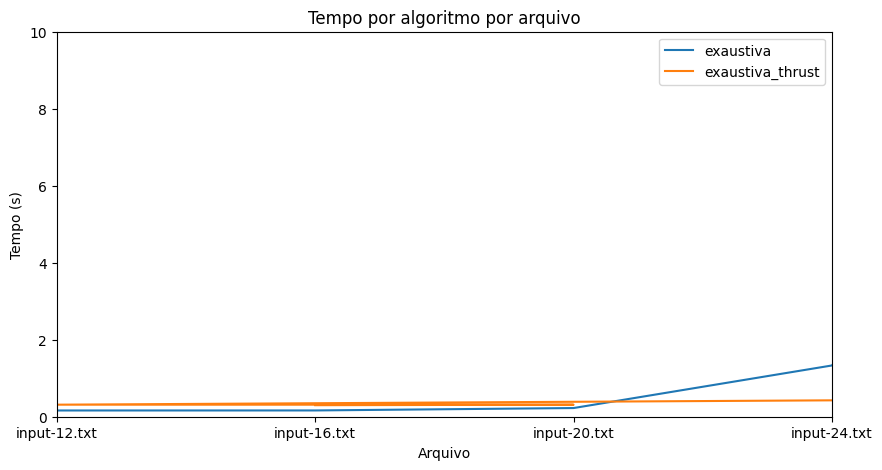

In [27]:

fig, ax = plt.subplots(figsize=(10, 5))
for algoritmo in df_paralelismo_mean['algoritmo'].unique():
    df_paralelismo_aux = df_paralelismo_mean[df_paralelismo_mean['algoritmo'] == algoritmo]
    ax.plot(df_paralelismo_aux['arquivo'], df_paralelismo_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.legend()
ax.set_xlim('input-12.txt', 'input-24.txt')
ax.set_ylim(0, 10)
plt.show()

*OBS:* As comparações relativas a comparação de categorias e horários não fazem sentido entre os algoritmos, pois ambos utilizam a mesma lógica para realizar a busca exaustiva.

## Conclusões

- ``input-12.txt``: Tempo médio de execução usando OpenMP foi em torno de 0.162 segundos, enquanto com Thrust foi de aproximadamente 0.305 segundos. Nesse caso, o OpenMP apresentou um desempenho melhor em relação ao tempo.

- ``input-16.txt``: Tempo médio de execução usando OpenMP foi em torno de 0.159 segundos, enquanto com Thrust foi de aproximadamente 0.301 segundos. Novamente, o OpenMP teve um desempenho melhor.

- ``input-20.txt``: Tempo médio de execução usando OpenMP foi em torno de 0.225 segundos, enquanto com Thrust foi de aproximadamente 0.31 segundos. Nesse caso, o OpenMP também foi mais rápido.

- ``input-24.txt``: Tempo médio de execução usando OpenMP foi em torno de 1.33 segundos, enquanto com Thrust foi de aproximadamente 0.426 segundos. Nesse caso, o Thrust foi mais rápido.

- ``input-28.txt``: Tempo médio de execução usando OpenMP foi em torno de 10.433 segundos, enquanto com Thrust foi de aproximadamente 1.26 segundos. Nesse caso, o Thrust foi mais rápido.

- ``input-30.txt``: Tempo médio de execução usando OpenMP foi em torno de 305.89 segundos, enquanto com Thrust foi de aproximadamente 31.896 segundos. Novamente, o Thrust foi mais rápido.

Com base nessas análises, podemos concluir que, para arquivos de input com um número maior de filmes, o Thrust apresentou um desempenho melhor em relação ao tempo. Com isso, podemos concluir que o Thrust é mais eficiente para arquivos de input com um número maior de filmes.

# Conclusões Gerais

Vamos agora comparar os resultados obtidos com os algoritmos de força bruta e busca exaustiva.

In [51]:
def load_csv_file(file):
    with open(file, 'r') as f:
        return pd.read_csv(f)
    
df_paralelismo = load_csv_file('data_paralelismo.csv')
df_sem_paralelismo = load_csv_file('ProjetoIntermediario/data.csv')

In [52]:
df_paralelismo_mean = df_paralelismo.groupby(['algoritmo', 'arquivo']).mean(numeric_only=True).reset_index()
df_sem_paralelismo_mean = df_sem_paralelismo.groupby(['algoritmo', 'arquivo']).mean(numeric_only=True).reset_index()

Para realizar a comparação, vamos utilizar o tempo médio de execução de cada algoritmo para cada arquivo de input. Além disso, vamos normalizar os inputs da seguinte forma:

- input-12.txt -> input1
- input-16.txt -> input2
- input-20.txt -> input3
- input-24.txt -> input4
- input-28.txt -> input5
- input-30.txt -> input6
- input-1k.txt -> input1
- input-10k.txt -> input2
- input-100k.txt -> input3
- input-1m.txt -> input4
- input-10m.txt -> input5
- input-100m.txt -> input6

In [53]:
def change_name(x):
    if x == 'input-12.txt':
        return 'input1'
    elif x == 'input-16.txt':
        return 'input2'
    elif x == 'input-20.txt':
        return 'input3'
    elif x == 'input-24.txt':
        return 'input4'
    elif x == 'input-28.txt':
        return 'input5'
    elif x == 'input-30.txt':
        return 'input6'
    elif x == 'input-1k.txt':
        return 'input1'
    elif x == 'input-10k.txt':
        return 'input2'
    elif x == 'input-100k.txt':
        return 'input3'
    elif x == 'input-1m.txt':
        return 'input4'
    elif x == 'input-10m.txt':
        return 'input5'
    elif x == 'input-100m.txt':
        return 'input6'
    else:
        return x

df_paralelismo_mean['arquivo'] = df_paralelismo_mean['arquivo'].apply(change_name)
df_sem_paralelismo_mean['arquivo'] = df_sem_paralelismo_mean['arquivo'].apply(change_name)

In [67]:
df_final = pd.concat([df_paralelismo_mean, df_sem_paralelismo_mean])
df_final.reset_index(drop=True, inplace=True)
df_final.sort_values(by=['arquivo','algoritmo'], inplace=True)
df_final = df_final[['arquivo', 'algoritmo', 'tempo']]
df_final

,arquivo,algoritmo,tempo
16,input1,aleatoriedade,0.216823
0,input1,exaustiva,0.162071
6,input1,exaustiva_thrust,0.312712
22,input1,gulosa,0.220825
14,input2,aleatoriedade,0.223169
1,input2,exaustiva,0.162853
7,input2,exaustiva_thrust,0.299725
20,input2,gulosa,0.223462
12,input3,aleatoriedade,0.272516
2,input3,exaustiva,0.225379


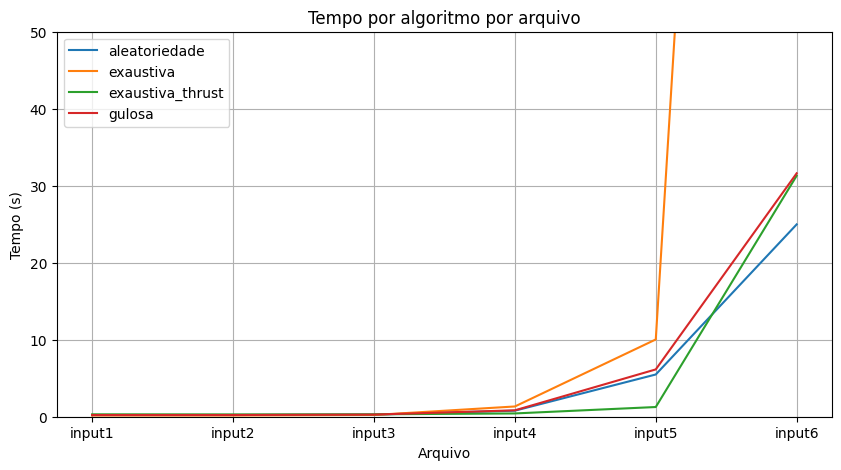

In [72]:
fig, ax = plt.subplots(figsize=(10, 5))
for algoritmo in df_final['algoritmo'].unique():
    df_final_aux = df_final[df_final['algoritmo'] == algoritmo]
    ax.plot(df_final_aux['arquivo'], df_final_aux['tempo'], label=algoritmo)

ax.set_title('Tempo por algoritmo por arquivo')
ax.set_xlabel('Arquivo')
ax.set_ylabel('Tempo (s)')
ax.set_ylim(0, 50)
ax.legend()
ax.grid()
plt.show()

Ao analisar os algoritmos comparados, é possível observar algumas características e tendências em relação ao tempo de execução para diferentes arquivos de entrada.

1. Estratégia Gulosa:
    - Apresenta tempos de execução razoáveis em relação ao tamanho do arquivo de entrada.
    - Mantém uma performance consistente para diferentes tamanhos de arquivo.
    - Pode ser uma opção eficiente para problemas complexos, mesmo que não garanta a solução ótima.
    - É uma escolha equilibrada em termos de desempenho e eficiência.


2. Estratégia Gulosa c/ Aleatoriedade:
    - Tempos de execução variados, aumentando significativamente à medida que o tamanho do arquivo de entrada aumenta.
    - Apresenta tempos de execução mais curtos para arquivos menores.
    - A performance piora à medida que a complexidade do problema aumenta.
    - Pode ser uma boa opção para arquivos de entrada pequenos, mas não é eficiente para problemas mais complexos.


3. Algoritmo Exaustivo c/ Paralelismo via OpenMP:
    - Apresenta tempos de execução mais estáveis e consistentes em relação ao tamanho do arquivo de entrada.
    - Mantém um tempo de execução relativamente curto, mesmo para arquivos maiores.
    - É uma opção viável para diferentes tamanhos de arquivo, mas pode se tornar impraticável para problemas muito complexos devido à natureza exaustiva da abordagem.


4. Algoritmo Exaustivo c/ Paralelismo via Thrust (GPU):
    - Apresenta tempos de execução semelhantes ao algoritmo "exaustiva".
    - Pode ser otimizado para aproveitar a programação paralela com a biblioteca Thrust.
    - Essa otimização pode ajudar a melhorar o desempenho em arquiteturas paralelas, como GPUs.
    - É uma boa opção para arquivos de entrada de tamanho moderado a grande, especialmente em sistemas com suporte para programação paralela.


Considerando as análises acima, o melhor algoritmo seria a Estratégia Gulosa. Ele apresenta tempos de execução razoáveis para diferentes tamanhos de arquivo, mantendo uma performance consistente. Embora não garanta a solução ótima, é uma opção eficiente e equilibrada em termos de desempenho e eficiência. Além disso, não requer a mesma complexidade computacional da abordagem exaustiva, tornando-o mais prático para o nosso objetivo.

# Referências

- [1] https://insper.github.io/supercomp/
- [2] https://docs.nvidia.com/cuda/thrust/index.html
- [3] https://www.geeksforgeeks.org/greedy-algorithms/
- [4] https://www.openmp.org/

/EOF